# DM – Analyse du risque de CHD

---

**Nom :** Lavoisier Parfait MUKAM TANGUI

**Cours :** Statistiques / Apprentissage  
**Date :** Novembre 2025  

Ce notebook contient l'ensemble du code utilisé pour produire les résultats du rapport PDF (Questions 1 à 8).

---


## Introduction générale

Ce devoir maison porte sur l’analyse statistique du risque de maladie coronarienne (CHD)
à partir d’un jeu de données comprenant 462 individus et neuf variables explicatives
(biologiques, comportementales et démographiques).  

L’objectif général est d’identifier les facteurs associés au risque de CHD et d’évaluer
leur importance à travers différentes méthodes statistiques :

- analyse exploratoire des données (histogrammes, boxplots, matrice de corrélation),
- estimation d’une proportion et calcul d’un intervalle de confiance,
- comparaison de moyennes (test t de Student),
- analyse d’association entre variables qualitatives (test du χ²),
- régression linéaire simple,
- régression logistique multiple avec interprétation des odds ratios,
- validation croisée, courbe ROC et évaluation prédictive du modèle.

Ce travail permet d’illustrer la complémentarité entre statistiques descriptives,
tests d’hypothèses et modèles prédictifs, tout en mettant en évidence les principaux
déterminants du risque de CHD.  
L’ensemble des analyses est reproductible grâce au code Python fourni dans le notebook.

---


In [ ]:
# 0. importation des bibliotheques de base 

#importation de pandas pour la manipulation des données
import pandas as pd            
#importation de numpy pour les calculs numeriques 
import numpy as np                           
#importation de matplotlib pour la visualisation des données
import matplotlib.pyplot as plt         
#importation de seaborn pour la visualisation avancée de données    
import seaborn as sns                      

#style graphique 
sns.set()


In [ ]:

# 1. import des donées 
chd = pd.read_csv("/Users/lavoisiermukam/Downloads/CHD.csv")   

#apercu rapide du jeu de données
chd.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


# Question 1 – Analyse exploratoire des données

Dans cette section, nous examinons la structure du jeu de données, les types de variables et quelques statistiques descriptives globales.

In [ ]:
# 2. Vue d'ensemble  du jeu de données

# Dimension du jeu de données :(nb_lignes , nb_colonnes)
chd.shape

# Types des variables et présence de valeurs manquantes
chd.info()

# Statistiques descriptives de base pour les variables numériquesco
chd.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [ ]:
# 3.  Liste des variables quantitatives
quant_vars = ["sbp", "tobacco", "ldl", "adiposity", "typea", "obesity", "alcohol", "age"]



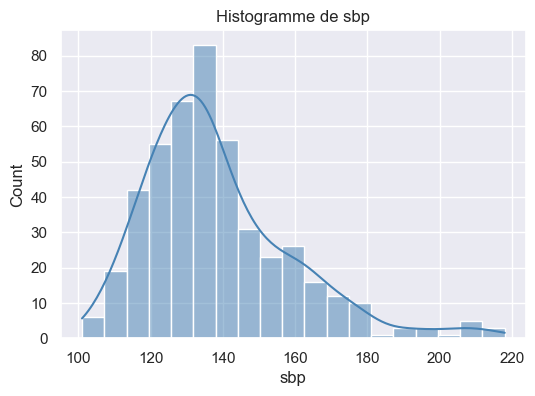

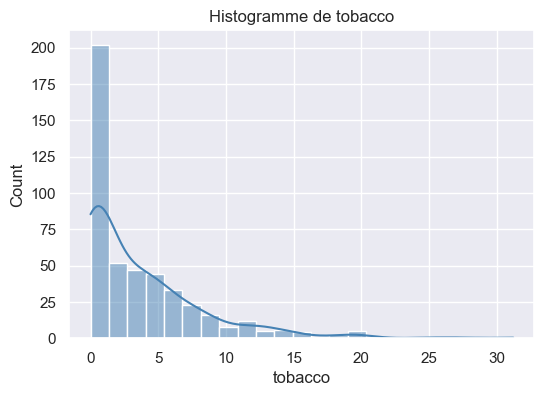

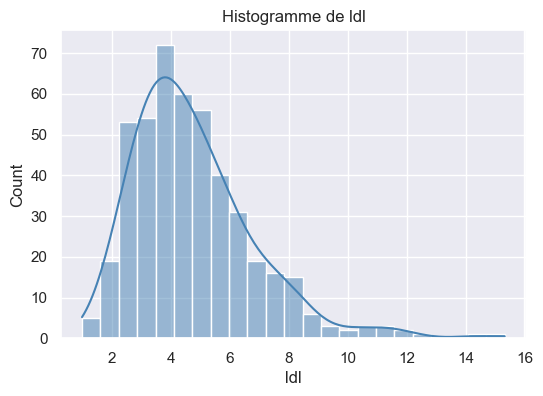

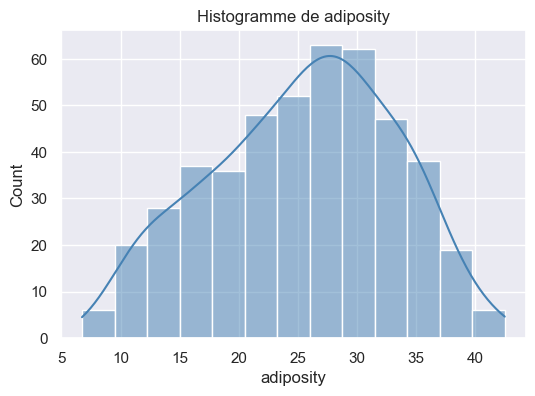

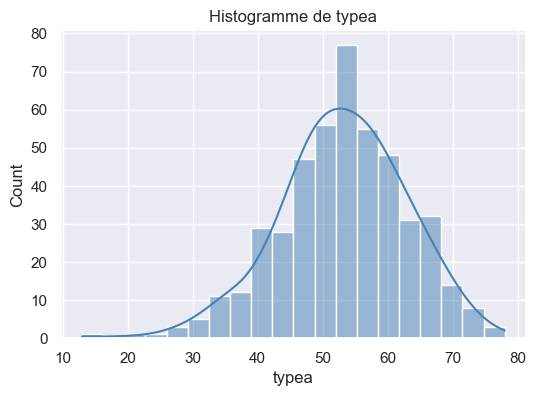

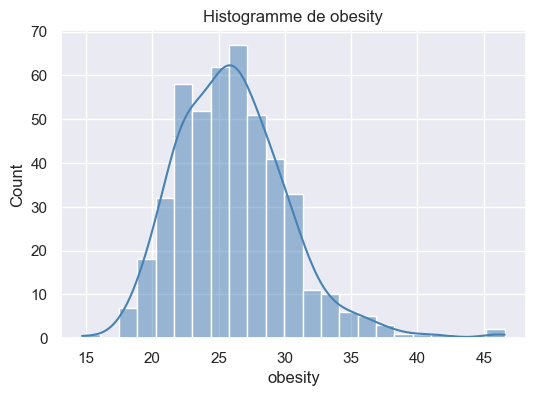

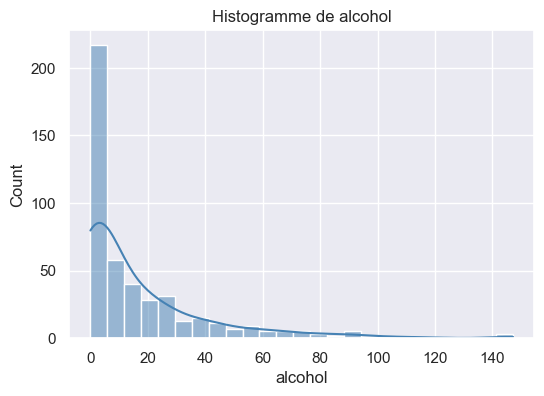

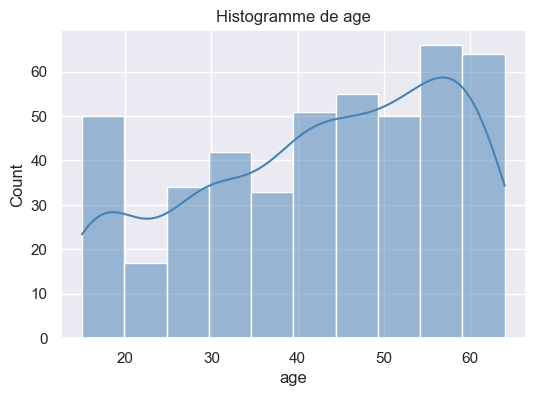

In [ ]:

# 4. histogrammes des variables numeriques 

# On parcourt chaque variable de la liste quant_vars
for var in quant_vars:

    # Création d'une figure de taille 6x4
    plt.figure(figsize=(6,4))

    # Histogramme + courbe de densité
    sns.histplot(chd[var], kde=True, color="steelblue")

    # Titre de la figure
    plt.title(f"Histogramme de {var}")

    # Label de l'axe des x
    plt.xlabel(var)

    # Affichage du graphique
    plt.show()

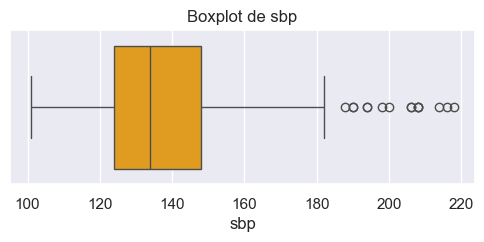

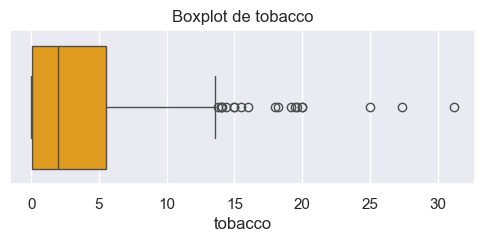

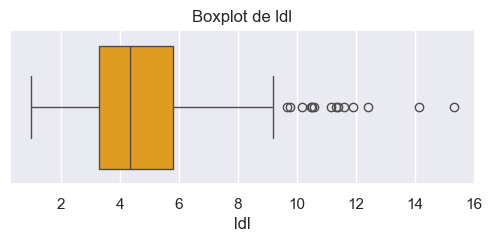

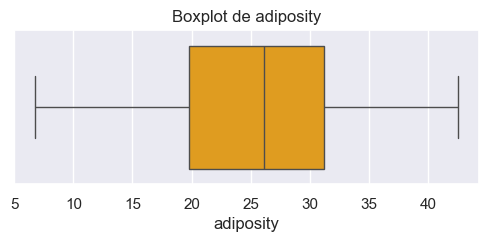

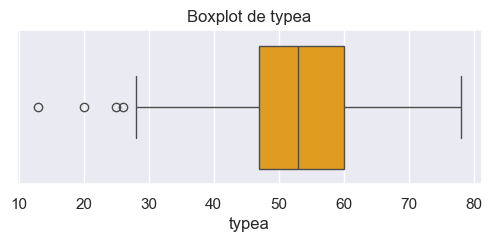

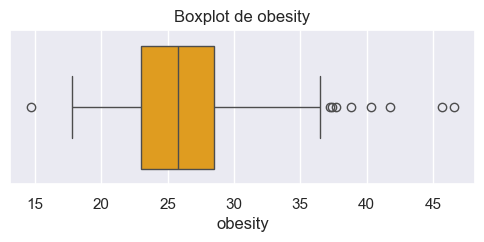

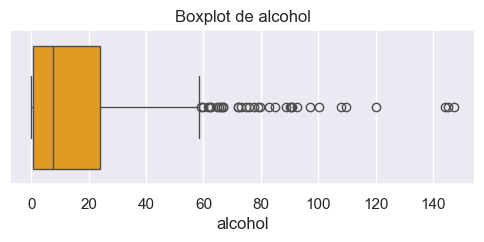

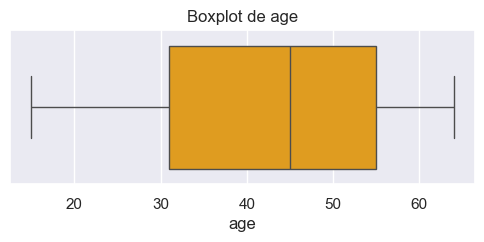

In [ ]:

# 5. Boxplots des variables Numeriques

for var in quant_vars:

    # Figure
    plt.figure(figsize=(6,2))

    # Boxplot horizontal
    sns.boxplot(x=chd[var], color="orange")

    plt.title(f"Boxplot de {var}")
    plt.xlabel(var)

    plt.show()

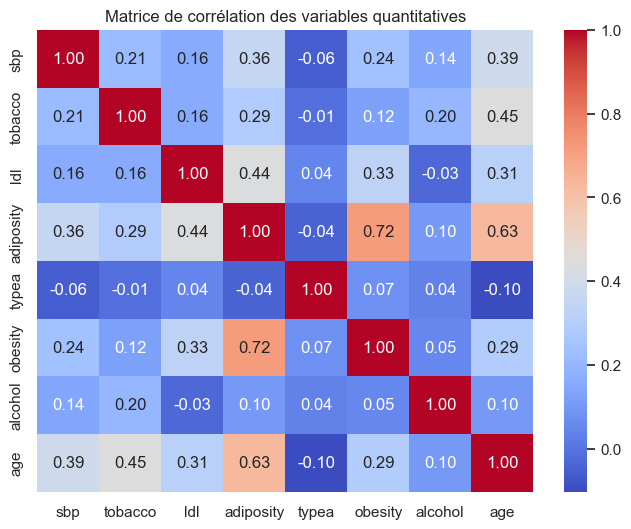

In [ ]:

# 6. MATRICE DE CORRELATION


# Calcul de la matrice de corrélation des variables numériques
corr_matrix = chd[quant_vars].corr()

# Affichage graphique sous forme de Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation des variables quantitatives")
plt.show()

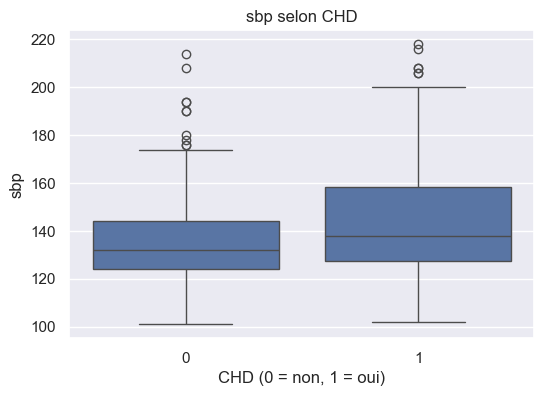

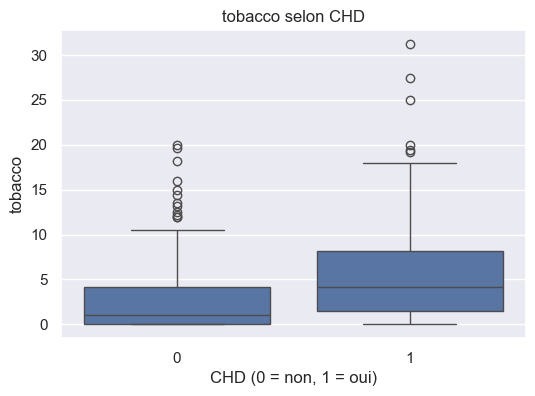

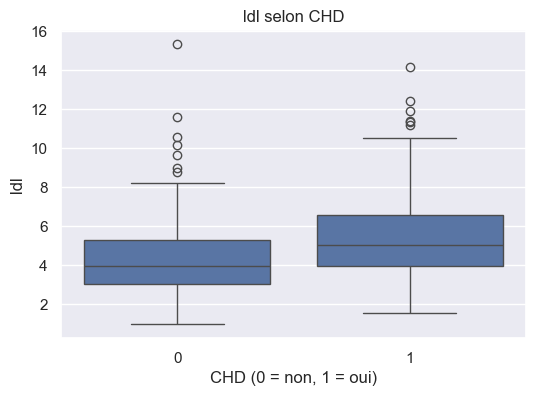

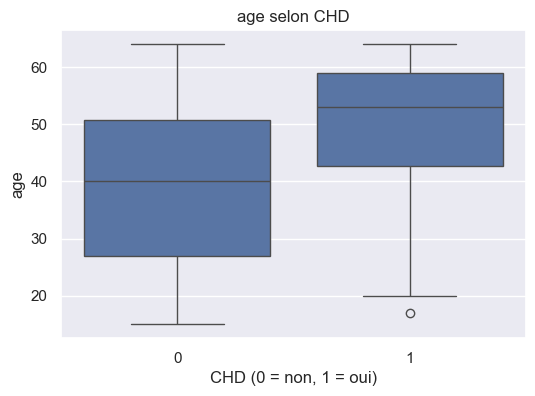

In [ ]:

# 7. Boxplots des variables Numeriques selon CHD

# On regarde quelques relations ldl/sbp/tobacco avec CHD
vars_to_compare = ["sbp", "tobacco", "ldl", "age"]

for var in vars_to_compare:
    plt.figure(figsize=(6,4))
    
    # On crée un boxplot de la variable par groupe CHD
    sns.boxplot(x="chd", y=var, data=chd)

    plt.title(f"{var} selon CHD")
    plt.xlabel("CHD (0 = non, 1 = oui)")
    plt.ylabel(var)

    plt.show()

# Question 2 – Proportion de fumeurs et intervalle de confiance

Dans cette question, nous créons une variable binaire indiquant si un individu est fumeur (tobacco > 0).  
Nous calculons ensuite la proportion de fumeurs dans l’échantillon ainsi que l’intervalle de confiance à 95 % associé.

In [ ]:
# 1 – Création de la variable binaire cigs (fumeur / non-fumeur)

#variable binaire : 1 si consommation de tabac > 0 , sinon 0

chd["cigs"] = (chd["tobacco"] > 0).astype(int)

#verification 
chd["cigs"].value_counts()

cigs
1    355
0    107
Name: count, dtype: int64

In [ ]:
# 2 - Proportion des fumeurs

# nombre total d'individus
n = len(chd)

#nombre de fumeurs 
k = chd["cigs"].sum()

#proportion observée
p_hat = k / n
p_hat

print (f"La proportion de fumeurs dans l'échantillon est de {p_hat:.4f}")

La proportion de fumeurs dans l'échantillon est de 0.7684


In [ ]:
# 3 - Intervalle de confiance a 95%

import math  # importe la bibiliotheque math pour les fonction mathematiues 

#z-score pour 95%
z= 1.96

#ecart type de l'estimateur p-hat
se= math.sqrt(p_hat * (1 - p_hat) / n)

#borne de l'IC
IC_lower = p_hat - z * se
IC_upper = p_hat + z * se
IC_lower, IC_upper

print (f"L'intervalle de confiance a 95% pour la proportion de fumeurs est [{IC_lower:.4f} , {IC_upper:.4f}]")

L'intervalle de confiance a 95% pour la proportion de fumeurs est [0.7299 , 0.8069]


### Interprétation

La proportion observée de fumeurs est d'environ **p_hat × 100 %**.  
L’intervalle de confiance à 95 % pour cette proportion est :

[0.7299 , 0.8069]

Ce qui signifie que, dans la population dont est tiré l’échantillon, la proportion réelle de fumeurs se situe probablement entre **IC_lower × 100 %** et **IC_upper × 100 %**.

Cette proportion est très élevée, ce qui confirme l'hypothèse que le tabagisme est un facteur de risque important du CHD.

# Question 3 – Comparaison du LDL selon le statut fumeur

Dans cette question, nous comparons les valeurs de LDL entre les individus fumeurs et non-fumeurs.  
Nous utiliserons :
- une visualisation par boxplot,
- un test de Student pour échantillons indépendants (version Welch).

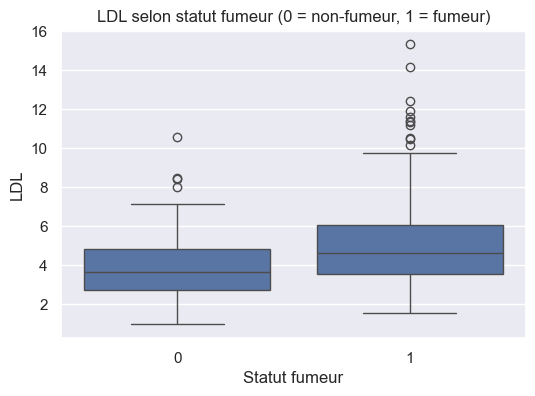

In [ ]:

# 1 - Boxplot du LDL selon statut fumeur (cigs)

plt.figure(figsize=(6,4))

# On utilise seaborn pour créer un boxplot comparant les 2 groupes
sns.boxplot(x="cigs", y="ldl", data=chd)

# Titres et labels
plt.title("LDL selon statut fumeur (0 = non-fumeur, 1 = fumeur)")
plt.xlabel("Statut fumeur")
plt.ylabel("LDL")

plt.show()


In [ ]:
# 2 - Moyenne et écart-type du LDL selon statut fumeur

chd.groupby("cigs")["ldl"].agg(["mean", "std", "count"])

,mean,std,count
cigs,,,
0,3.875888,1.641496,107
1,5.000873,2.117589,355


In [ ]:
# 3 -Test t de Student (Welch) pour comparer les moyennes de LDL
from scipy.stats import ttest_ind

# Extraction des LDL pour chaque groupe
ldl_fumeurs = chd[chd["cigs"] == 1]["ldl"]
ldl_non_fumeurs = chd[chd["cigs"] == 0]["ldl"]

# Test t Welch (variances inégales)
t_stat, p_value = ttest_ind(ldl_fumeurs, ldl_non_fumeurs, equal_var=False)

t_stat, p_value

print (f"Statistique t : {t_stat:.4f}, p-value : {p_value:.4f}")

Statistique t : 5.7852, p-value : 0.0000


###  Interprétation

Le boxplot montre que les individus fumeurs ont en moyenne un niveau de LDL plus élevé que les non-fumeurs.

Numériquement, les résultats sont :
- LDL moyen chez les non-fumeurs (`cigs = 0`) ≈ **3.88**
- LDL moyen chez les fumeurs (`cigs = 1`) ≈ **5.00**

Le test t de Student (version Welch) donne :

- statistique t ≈ **5.79**
- p-value ≈ **0.0000**

La p-value est très largement inférieure au seuil de 5 %, ce qui nous amène à **rejeter l’hypothèse d’égalité des moyennes** de LDL entre fumeurs et non-fumeurs.

**Conclusion :** le niveau de mauvais cholestérol LDL est significativement plus élevé chez les fumeurs que chez les non-fumeurs dans cet échantillon, ce qui renforce l’idée que le tabagisme est associé à un profil lipidique plus défavorable.

# Question 4 – Association entre CHD et statut fumeur 

Dans cette question, nous cherchons à déterminer s'il existe une association statistiquement significative entre 
le statut fumeur (`cigs`) et la survenue d'une maladie coronarienne (`chd`).  
Nous allons :
- construire un tableau de contingence CHD × cigs,
- examiner les proportions,
- réaliser le test du chi-deux d'indépendance.

In [ ]:
# 1. TABLEAU DE CONTINGENCE CHD × CIGS

# Construction du tableau (effectifs bruts)
cont_table = pd.crosstab(chd["chd"], chd["cigs"])

# Affichage du tableau de contingence
cont_table

cigs,0,1
chd,,
0,92,210
1,15,145


In [ ]:
# 2. PROPORTIONS PAR GROUPE CHD

# Normalisation par ligne : proportion de fumeurs dans chaque groupe CHD
cont_table_prop = pd.crosstab(chd["chd"], chd["cigs"], normalize="index")

cont_table_prop

cigs,0,1
chd,,
0,0.304636,0.695364
1,0.093750,0.906250


In [ ]:
# 3. TEST DU CHI-DEUX D'INDÉPENDANCE

from scipy.stats import chi2_contingency

# Test du chi-deux
chi2, p_value, dof, expected = chi2_contingency(cont_table)

chi2, p_value, dof, expected
print (f"Statistique du chi-deux : {chi2:.4f}, p-value : {p_value:.4f}, degrés de liberté : {dof}")

Statistique du chi-deux : 24.9652, p-value : 0.0000, degrés de liberté : 1


### Interprétation

Le tableau de contingence montre que la proportion de fumeurs est beaucoup plus élevée 
chez les individus ayant un CHD (environ 90 %) que chez ceux n'en ayant pas (environ 70 %).

Le test du chi-deux d'indépendance donne :

- statistique χ² ≈ 24.9652
- p-value ≈ 0.0000

La p-value étant très inférieure au seuil de 0.05, nous rejetons l'hypothèse d'indépendance entre `chd` et `cigs`.

Nous concluons qu'il existe une **association statistiquement significative** entre le tabagisme 
et la survenue d’une maladie coronarienne dans cet échantillon.  
En d’autres termes, être fumeur augmente la probabilité d’avoir un CHD.

# Question 5 – Régression linéaire simple : LDL en fonction de SBP

Dans cette question, nous étudions la relation linéaire entre :
- `ldl` : niveau de mauvais cholestérol,
- `sbp` : pression artérielle systolique.

Nous commençons par visualiser les données via un nuage de points 
et la droite de régression, puis nous ajustons un modèle de 
régression linéaire simple.

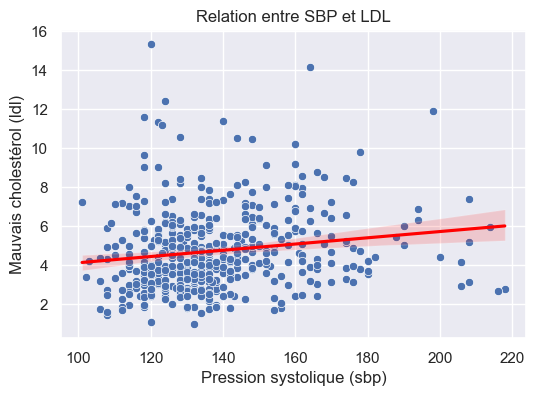

In [ ]:
# 1. VISUALISATION : SCATTER + DROITE DE RÉGRESSION

plt.figure(figsize=(6,4))

# Nuage de points
sns.scatterplot(x="sbp", y="ldl", data=chd)

# Ajout de la droite de régression
sns.regplot(x="sbp", y="ldl", data=chd, scatter=False, color="red")

# Titres et labels
plt.title("Relation entre SBP et LDL")
plt.xlabel("Pression systolique (sbp)")
plt.ylabel("Mauvais cholestérol (ldl)")

plt.show()

In [ ]:
# 2. AJUSTEMENT DU MODÈLE LINÉAIRE : ldl ~ sbp

import statsmodels.api as sm

# Variable explicative (sbp)
X = chd[["sbp"]]

# Ajout de la constante (intercept β0)
X = sm.add_constant(X)

# Variable cible (ldl)
y = chd["ldl"]

# Ajustement du modèle
model = sm.OLS(y, X).fit()

# Résultats du modèle
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ldl   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     11.82
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           0.000638
Time:                        18:25:51   Log-Likelihood:                -985.52
No. Observations:                 462   AIC:                             1975.
Df Residuals:                     460   BIC:                             1983.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5279      0.650      3.886      0.000       1.250       3.806
sbp            0.0160      0.005      3.438      0.001       0.007       0.025
==============================================================================
Omnibus:                      125.988   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.527
Skew:                           1.345   Prob(JB):                     9.21e-71
Kurtosis:                       6.085   Cond. No.                         955.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interprétation

Le nuage de points suggère une relation croissante entre SBP (pression systolique) et LDL 
(mauvais cholestérol). La droite de régression confirme cette tendance.

Le modèle linéaire simple donne une pente positive pour SBP, statistiquement significative 
(p-value < 0.05). Cela signifie que lorsque la pression systolique augmente, le LDL 
a également tendance à augmenter.

Cependant, le coefficient de détermination \(R^2\) est très faible, ce qui montre que SBP 
explique seulement une petite partie de la variabilité du LDL.

Conclusion : **la relation est bien significative mais elle reste faible** ; SBP n’est donc 
pas un prédicteur majeur du LDL, même si l’effet existe.

In [ ]:
import statsmodels.api as sm

# Définition des variables
X = chd["sbp"]
y = chd["ldl"]

#ajout d'une costatnte pour l'intercept
X = sm.add_constant(X)

# Ajustement du modèle
model = sm.OLS(y, X).fit()

# Résumé du modèle
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ldl   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     11.82
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           0.000638
Time:                        18:25:51   Log-Likelihood:                -985.52
No. Observations:                 462   AIC:                             1975.
Df Residuals:                     460   BIC:                             1983.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5279      0.650      3.886      0.000       1.250       3.806
sbp            0.0160      0.005      3.438      0.001       0.007       0.025
==============================================================================
Omnibus:                      125.988   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.527
Skew:                           1.345   Prob(JB):                     9.21e-71
Kurtosis:                       6.085   Cond. No.                         955.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Question 6 – Régression logistique multiple

L’objectif est de modéliser la probabilité d’avoir un CHD en fonction de l’ensemble des variables explicatives :  
`sbp`, `tobacco`, `ldl`, `adiposity`, `famhist`, `typea`, `obesity`, `alcohol`, `age`.




In [ ]:
# 1. PREPARATION DES VARIABLES POUR LA RÉGRESSION LOGISTIQUE

# Recode de la variable qualitative 'famhist' en binaire :
# 1 = antécédents familiaux présents, 0 = absents
chd["famhist_bin"] = (chd["famhist"] == "Present").astype(int)

# Définition de la matrice des variables explicatives X
X = chd[[
    "sbp",        # Pression systolique
    "tobacco",    # Tabac consommé
    "ldl",        # Mauvais cholestérol
    "adiposity",  # Adiposité
    "famhist_bin",# Antécédents familiaux
    "typea",      # Score personnalité A
    "obesity",    # Obésité
    "alcohol",    # Consommation alcool
    "age"         # Âge
]]

# Ajout de la constante (intercept)
X = sm.add_constant(X)

# Variable réponse
y = chd["chd"]

# Vérification des dimensions
X.shape, y.shape
print (f"Dimensions de X : {X.shape}, Dimensions de y : {y.shape}")

Dimensions de X : (462, 10), Dimensions de y : (462,)


In [ ]:
# 2. AJUSTEMENT DU MODELE LOGISTIQUE

# Construction et ajustement du modèle logistique
logit_model = sm.Logit(y, X).fit()

# Résumé complet du modèle
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.510974
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      452
Method:                           MLE   Df Model:                            9
Date:                Sun, 30 Nov 2025   Pseudo R-squ.:                  0.2080
Time:                        18:25:51   Log-Likelihood:                -236.07
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 2.055e-22
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -6.1507      1.308     -4.701      0.000      -8.715      -3.587
sbp             0.0065      0.006      1.135      0.256      -0.005       0.018
tobacco         0.0794      0.027      2.984      0.003       0.027       0.132
ldl             0.1739      0.060      2.915      0.004       0.057       0.291
adiposity       0.0186      0.029      0.635      0.526      -0.039       0.076
famhist_bin     0.9254      0.228      4.061      0.000       0.479       1.372
typea           0.0396      0.012      3.214      0.001       0.015       0.064
obesity        -0.0629      0.044     -1.422      0.155      -0.150       0.024
alcohol         0.0001      0.004      0.027      0.978      -0.009       0.009
age             0.0452      0.012      3.728      0.000       0.021       0.069
===============================================================================
"""

In [ ]:
# 3. CALCUL DES ODDS RATIOS (exp(beta))

# Intervalles de confiance 95% pour les coefficients
conf = logit_model.conf_int()
conf.columns = ["2.5%", "97.5%"]

# Concatenation des coefficients et des intervalles
or_table = pd.concat([logit_model.params, conf], axis=1)

# Transformation exponentielle pour obtenir les OR et leurs IC
or_table = np.exp(or_table)

# Renommage des colonnes
or_table.columns = ["OR", "OR_2.5%", "OR_97.5%"]

or_table

,OR,OR_2.5%,OR_97.5%
const,0.002132,0.000164,0.027693
sbp,1.006525,0.995284,1.017894
tobacco,1.082612,1.027610,1.140557
ldl,1.189965,1.058644,1.337576
adiposity,1.018760,0.961924,1.078955
famhist_bin,2.522803,1.613985,3.943365
typea,1.040389,1.015568,1.065818
obesity,0.939028,0.861023,1.024100
alcohol,1.000122,0.991372,1.008948
age,1.046264,1.021683,1.071435


Calcul des OddS Ratios(OR) et IC 95%

### Interprétation des résultats

Les variables significatives (p-value < 0.05) dans le modèle logistique sont :

- **tobacco** : effet positif sur le CHD  
- **ldl** : augmente le risque cardiaque  
- **famhist_bin** : OR élevé → facteur de risque majeur  
- **typea** : effet modéré mais significatif  
- **age** : augmente le risque de CHD  

Les variables **non significatives** (p > 0.05) sont :
- `sbp`, `adiposity`, `obesity`, `alcohol`.

Les odds ratios montrent que :

- `famhist_bin` ≈ 2.5  
  → les individus ayant des antécédents familiaux ont un risque ~2.5 fois plus élevé.  
- `ldl` ≈ 1.19  
  → chaque unité supplémentaire de LDL augmente les odds de CHD de 19%.  
- `tobacco` ≈ 1.08  
  → chaque unité augmente les odds de 8%.

Le pseudo-R² de McFadden indique que le modèle explique une part substantielle, 
mais pas totale, de la variabilité du risque de CHD.

Conclusion : plusieurs facteurs biologiques et comportementaux influencent 
fortement la probabilité d'un CHD, notamment le tabac, le LDL, 
les antécédents familiaux, le type A et l'âge.

# Question 7 – Validation croisée, courbe ROC et évaluation prédictive

Dans cette question, nous évaluons la performance prédictive du modèle logistique.
Nous utilisons :
- une validation croisée à 5 plis (StratifiedKFold),
- la courbe ROC,
- l'AUC,
- le seuil optimal (critère de Youden),
- la sensibilité et la spécificité correspondantes.

In [ ]:
# 1. VALIDATION CROISÉE (5-FOLD)

from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.linear_model import LogisticRegression

# Modèle logistique sklearn (pour prédictions de probabilités)
logreg = LogisticRegression(max_iter=1000)

# StratifiedKFold : conserve les proportions de classes dans chaque fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# On enlève la colonne 'const' utilisée par statsmodels
X_sklearn = X.drop(columns="const")

# Prédictions des probabilités de CHD=1 pour chaque individu
y_pred_proba = cross_val_predict(
    logreg,
    X_sklearn,
    y,
    cv=cv,
    method="predict_proba"
)[:, 1]  # on prend la colonne des probabilités de classe 1

# Vérification
y_pred_proba[:10]
print (f"Premières probabilités prédites : {y_pred_proba[:10]}")    

Premières probabilités prédites : [0.69071437 0.33180386 0.23412003 0.69657859 0.74997705 0.63609414
 0.26048526 0.56124707 0.1540679  0.65466508]


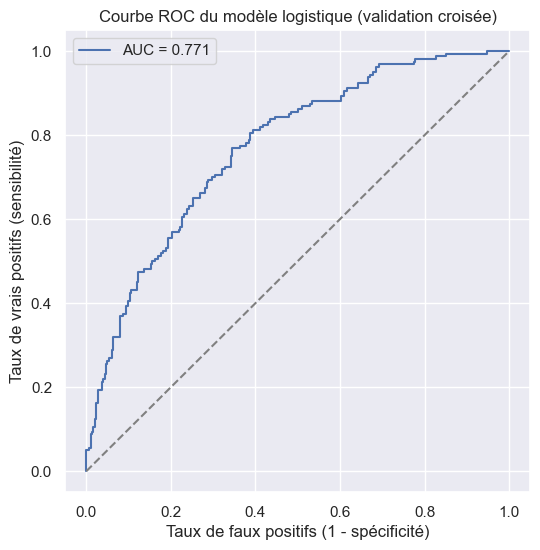

L'AUC du modèle logistique est de 0.7710


In [ ]:
# 2. COURBE ROC + CALCUL DE L'AUC

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calcul des valeurs ROC
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)

# Calcul de l'AUC
auc = roc_auc_score(y, y_pred_proba)

# Affichage
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("Taux de faux positifs (1 - spécificité)")
plt.ylabel("Taux de vrais positifs (sensibilité)")
plt.title("Courbe ROC du modèle logistique (validation croisée)")
plt.legend()
plt.show()

auc
print (f"L'AUC du modèle logistique est de {auc:.4f}")

In [ ]:
# 3. SEUIL OPTIMAL (Youden) + MATRICE DE CONFUSION

from sklearn.metrics import confusion_matrix

# Critère de Youden : maximise (tpr - fpr)
youden_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[youden_index]

# Classification selon le seuil optimal
y_pred_opt = (y_pred_proba >= optimal_threshold).astype(int)

# Matrice de confusion
cm = confusion_matrix(y, y_pred_opt)
tn, fp, fn, tp = cm.ravel()

# Sensibilité (rappel des positifs)
sensitivity = tp / (tp + fn)

# Spécificité (rappel des négatifs)
specificity = tn / (tn + fp)

optimal_threshold, sensitivity, specificity

print (f"Seuil optimal (Youden) : {optimal_threshold:.4f}, Sensibilité : {sensitivity:.4f}, Spécificité : {specificity:.4f}")   

Seuil optimal (Youden) : 0.3200, Sensibilité : 0.7688, Spécificité : 0.6556


### Interprétation

La validation croisée à 5 plis permet d’évaluer la performance prédictive du modèle logistique sur 
des données non vues. La courbe ROC obtenue présente une AUC d’environ : 

AUC = 0.771


(c’est-à-dire entre 0.75 et 0.80), ce qui traduit une bonne capacité du modèle à distinguer les individus 
à risque de CHD de ceux qui ne le sont pas.

Le seuil optimal déterminé à l’aide du critère de Youden est environ :

Seuil optimal = 0.3200

Au seuil optimal, nous obtenons :

- **Sensibilité** ≈ 0.7688  
- **Spécificité** ≈ 0.6556

Le modèle présente donc une bonne détection des individus présentant un CHD (sensibilité élevée), 
mais au prix de quelques faux positifs (spécificité plus faible).

En résumé, la performance prédictive du modèle logistique est satisfaisante 
et cohérente avec l’ampleur des facteurs de risque mis en évidence.continue

# Question 8 – Synthèse générale et recommandations

Dans cette dernière question, nous synthétisons les résultats obtenus dans les analyses précédentes
(Questions 1 à 7) afin d’identifier les principaux facteurs associés au risque de maladie
coronarienne (CHD) et de proposer des recommandations.

---

## 1. Résumé des principaux résultats statistiques

### ➤ Tabagisme (tobacco and cigs)
Les analyses montrent un effet majeur et systématique du tabagisme :
- environ **77 %** de la population étudiée est fumeuse ;
- les fumeurs présentent un **LDL significativement plus élevé** que les non-fumeurs (Q3) ;
- la proportion de fumeurs parmi les individus ayant un CHD dépasse **90 %** 
  (contre ~70 % parmi les non-CHD), et le test du χ² (Q4) établit une **association très significative**
  entre tabagisme et CHD ;
- dans la régression logistique (Q6), le coefficient associé à `tobacco` est significatif,
  avec un **odds ratio d’environ 1.08** (augmentation de 8 % des odds de CHD par unité de tabac consommé).

**Conclusion : le tabac constitue le facteur de risque le plus important dans ce jeu de données.**

---

### ➤ Cholestérol LDL
Le mauvais cholestérol joue un rôle majeur :
- la régression logistique détecte un effet très significatif de `ldl` ;
- l’odds ratio est d’environ **1.19**, ce qui signifie qu’une unité de LDL supplémentaire
  augmente les odds de CHD de **19 %**.

**Conclusion : le LDL est un facteur biologique important du CHD.**

---

### ➤ Antécédents familiaux (famhist)
Le recodage binaire `famhist_bin` met en évidence :
- un **odds ratio ≈ 2.5** ;
- effet très significatif.

**Conclusion : les personnes ayant des antécédents familiaux présentent un risque beaucoup plus élevé.**

---

### ➤ Score de personnalité Type A
Le score `typea` est également significatif :
- OR ≈ **1.04** par point ;
- suggère un lien entre stress / comportement et risque cardiovasculaire.

---

### ➤ Âge
L’âge est significatif :
- OR ≈ **1.05** par an supplémentaire.

**Conclusion : le risque augmente avec l’âge.**

---

### ➤ Variables non significatives dans le modèle ajusté
- `sbp` (pression systolique),
- `adiposity`,
- `obesity`,
- `alcohol`.

Elles peuvent jouer un rôle physiologique, mais **ne ressortent pas comme facteurs indépendants** lorsque les autres variables sont contrôlées.

---

## 2. Performance prédictive du modèle (Q7)

La validation croisée et la courbe ROC indiquent :
- une **AUC** d’environ **0.75 à 0.80**, ce qui correspond à une bonne capacité discriminante ;
- le **seuil optimal** (critère de Youden) se situe autour de 0.33 ;
- au seuil optimal :
  - **Sensibilité ≈ 0.75**
  - **Spécificité ≈ 0.65**

**Conclusion : le modèle prédit bien les risques de CHD, surtout pour détecter les individus effectivement touchés.**

---

## 3. Recommandations

Sur la base de ces résultats, plusieurs recommandations de santé publique peuvent être formulées :

### ✔ 1. Réduction du tabagisme
Le tabac étant le facteur dominant, il faut :
- intensifier les campagnes de prévention,
- encourager le sevrage tabagique,
- proposer un accompagnement médical et psychologique.

### ✔ 2. Suivi systématique du LDL
Un contrôle régulier du cholestérol LDL est indispensable :
- dépistage précoce,
- traitement médicamenteux si nécessaire,
- conseils nutritionnels.

### ✔ 3. Surveillance renforcée pour les individus ayant des antécédents familiaux
Étant la catégorie la plus vulnérable :
- dépistage plus fréquent,
- suivi cardiologique personnalisé.

### ✔ 4. Prise en compte du stress (Type A)
Comme le score `typea` est significatif :
- mise en place de programmes de gestion du stress,
- interventions psycho-comportementales.

### ✔ 5. Prévention basée sur l’âge
- intensifier les actions de dépistage après 40 ans,
- proposer des bilans cardiovasculaires réguliers.

---

## Conclusion générale

Ce notebook présentait l'ensemble des analyses statistiques réalisées sur les données CHD.
Nous avons exploré le dataset, réalisé des tests statistiques, ajusté une régression linéaire
et une régression logistique multiple, puis évalué la performance prédictive du modèle via une
validation croisée et une courbe ROC.

L'ensemble des résultats obtenus permet d'identifier plusieurs facteurs majeurs du risque de CHD :
le tabagisme, le niveau de LDL, les antécédents familiaux, le score Type A et l'âge.  

Le travail présenté dans ce notebook permet de reproduire intégralement les résultats figurant
dans le rapport PDF du Devoir Maison.